# What's the point?

You are a data scientist for the MTA. For your first project, they want you to predict the number of subway riders for each day. You decide to do a linear regression model predict the riders but need to gather data first. With a partner brainstorm a list of different variables you think would explain the number of daily riders. 

# Multiple Linear Regression

**Aim**: SWBAT create and interpret a multiple linear regression model, explain the necessity of and perform basic data preparation, and explain what multicolinearity is and how to avoid it. Also, SWBAT check the assumptions of linear regression.

Breaking down today's lecture:
1. What's the point?*
2. How does it work?
3. Muliticolini-what? 
4. Linear Regression Data Prep
5. Linear Regression Assumptions*

*Sections with stars also apply to simple linear regression, too!*

*Notebook based on Flatiron DS Immersive instructor Sean Abu's Multiple Linear Regression lecture.*

## Why multiple linear regression?


Using all of the features you mentioned is _far_ more effective at predicting and understanding ridership!

But, generally speaking, there are 3 major uses for (multiple) linear regression analysis.  

1. Useful to **identify the strength of the effect** that the independent variables have on a dependent variable.
    - Strong or weak relationship? 


2. **Quantitatively forecast effects or impacts of changes.**  That is, multiple linear regression analysis helps us to understand how much will the dependent variable change when we change the independent variables.  
     - Multiple linear regression allows us to do so _comparatively_ -- does one feature have _more_ of an impact than another? 
     - Allows us the answer the question: What is the most important feature when predicting our target? 


3. **Predicts trends and other values outside your dataset.**  The multiple linear regression analysis can be used to get point estimates.

# How does it work?

## Code
Basically the same as what we've already learned!

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")

In [3]:
#read in car data
df = sns.load_dataset('mpg')


In [4]:
#fill in the missing values for horsepower
df['horsepower'].fillna((df['horsepower'].mean()), inplace=True)


In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [9]:
# building a linear regression model using statsmodel 
from statsmodels.formula.api import ols

slr_model = ols(formula='mpg~weight', data=df).fit()

In [10]:
slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Thu, 21 Jan 2021   Prob (F-statistic):          2.97e-103
Time:                        08:07:10   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# building a linear regression model using statsmodel 

mlr_model = ols(formula='mpg~weight+horsepower+displacement', data=df).fit()

mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     313.2
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          6.53e-104
Time:                        16:29:09   Log-Likelihood:                -1140.0
No. Observations:                 398   AIC:                             2288.
Df Residuals:                     394   BIC:                             2304.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       44.9132      1.198     37.492      0.000      42.558      47.268
weight          -0.0054      0.001     -7.657      0.000      -0.007      -0.004
horsepower      -0.0374      0.013     -2.957      0.003      -0.062      -0.013
displacement    -0.0068      0.007     -1.031      0.303      -0.020       0.006
==============================================================================
Omnibus:                       38.132   Durbin-Watson:                   0.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.215
Skew:                           0.713   Prob(JB):                     1.25e-11
Kurtosis:                       3.998   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When studying linear regression, you will see many graphs that look like the one below where you are trying to explain the variation in the Y based on x value. This, however, only applies to simple linear regression. This visualization is does not capture the model when working with multiple linear regression. 

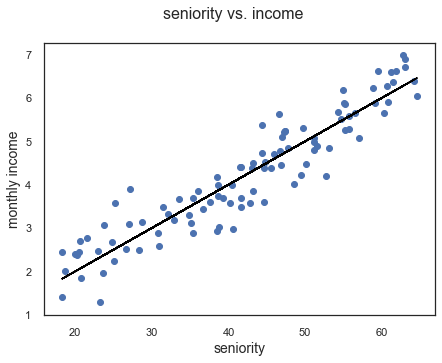

In [16]:

np.random.seed(1234)
sen = np.random.uniform(18, 65, 100)
income = np.random.normal((sen/10), 0.5)
sen = sen.reshape(-1,1)

fig = plt.figure(figsize=(7,5))
fig.suptitle('seniority vs. income', fontsize=16)
plt.scatter(sen, income)
plt.plot(sen, sen/10, c = "black")
plt.xlabel("seniority", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.show()

If we include another factor, such as years of education, that is  adding anoterh dimension to the model. So with two features, our model will be three dimensional and the line of least squares becomes a plane. 
<img src="multi_reg_graph.png" style="withd:300px;">

Now let's fit a model to all of our continuous features. 

In [17]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [19]:
lr_model = ols(formula='mpg~weight+model_year', data=df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     830.4
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          3.26e-142
Time:                        16:41:00   Log-Likelihood:                -1054.3
No. Observations:                 398   AIC:                             2115.
Df Residuals:                     395   BIC:                             2127.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.1980      3.968     -3.578      0.000     -21.998      -6.398
weight        -0.0067      0.000    -31.161      0.000      -0.007      -0.006
model_year     0.7566      0.049     15.447      0.000       0.660       0.853
==============================================================================
Omnibus:                       41.827   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.734
Skew:                           0.665   Prob(JB):                     1.19e-15
Kurtosis:                       4.541   Cond. No.                     7.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Mathematically

Multiple linear regression has the form:
$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2  + \beta_3 X_3\cdots + \beta_k X_k + \epsilon$$

### Your turn #1
Based on what we learned about simple linear regression what do each of the following represent?
- $Y$
- $\beta_0$
- $\epsilon$

### What are $\beta_1 ... \beta_n$? How are they computed? 

They are our coefficients of the features in the model, just like in simple linear regression. Each of coefficients represent the impact of $X_i$ on $Y$, *all other features held constant*. 
- If no other features changed, what impact would increasing $X_i$ by one unit have on the other features? 


This is essentially how they are computed! See [this article](https://online.stat.psu.edu/stat462/node/132/) for the methods used to calculate these coefficients (note: this will involve lots of linear algebra, but the article explains all the concepts you'll need to know!).

___

# Multicollinearity 

### What is it?

**Multicollinearity** occurs when "independent" variables in a regression model are very highly correlated. 
- Note the quotes! This is the crux of the issue. (gets into computation - invertible matrices are inherently comprised of independent columns)
- Correlation is not the _only_ metric that can be used, though a correlation of .7 and above or .9 and above are common thresholds for "too" multicolinear. 
    - VIF is another metric that you can learn about [here](https://www.investopedia.com/terms/v/variance-inflation-factor)

There are two basic kinds of multicollinearity:

- **Structural multicollinearity:** This type occurs when we create a model term using other terms. You produce it, rather than it being inherent to the data.
    - Ex: The salary of a baseball player in dollars and in yen are perfectly correlated 
- **Data multicollinearity:** This type of multicollinearity is present in the data itself rather than being an artifact of our model. Observational experiments are more likely to exhibit this kind of multicollinearity.
    - Ex: How much someone exercises and how much water they drink may be highly correlated 

### What Problems Do Multicollinearity Cause?

Multicollinearity causes the following two basic types of problems:

- The coefficient estimates can swing wildly based on which other independent variables are in the model. The **coefficients become very sensitive to small changes in the model**.
- Multicollinearity **reduces the precision of the estimate coefficients, which weakens the statistical power of your regression model**. You might not be able to trust the p-values to identify independent variables that are statistically significant.

### Do I Have to Fix Multicollinearity?

The need to reduce multicollinearity depends on its severity and your primary goal for your regression model. Keep the following three points in mind:

- The **severity of the problems increases with the degree of the multicollinearity**. Therefore, if you have only moderate multicollinearity, you may not need to resolve it.
- Multicollinearity **affects only the specific independent variables that are correlated**. Therefore, if multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it. 
- Multicollinearity **affects the coefficients and p-values, but it does not influence the predictions**, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

***That being said, the easiest way to deal with multicollinearity is just to remove one of the variables.***

### Code time!

In [10]:
# Compute the correlation matrix
corr = df.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


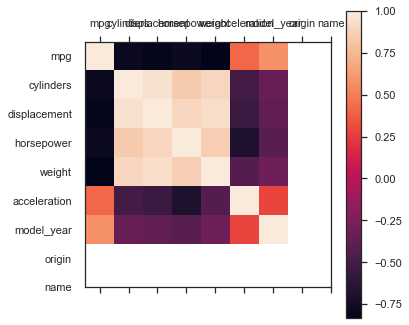

In [11]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

Ooof, that's one ugly heatmap -- let's make a better one so we can really see what's going on.

#### Create a Better Looking Heatmap with Seaborn

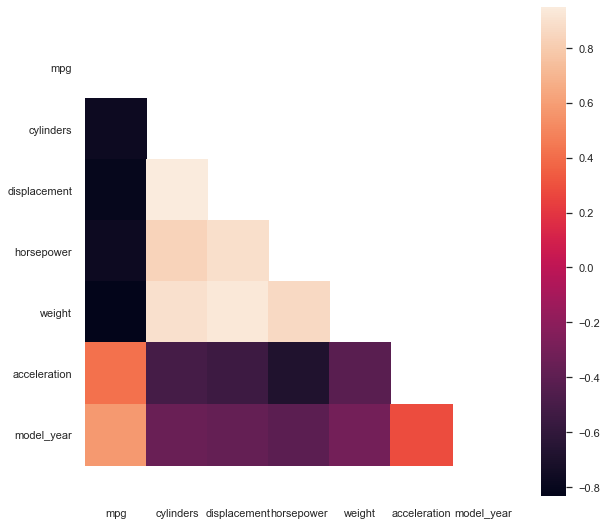

In [12]:
# Set up  matplotlib figure (might have to play around with the 
# figsize if your labels aren't so legible and you don't want
# to mess with the labels using matplotlib)
f, ax = plt.subplots(figsize=(10, 9))

# Create an upper triangular matrix to use to get rid of duplicate/
# useless values
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr(), mask=mask, square=True)
    
# fix for mpl bug that cuts off top/bottom of seaborn viz
# credit: https://github.com/mwaskom/seaborn/issues/1773 SalMac86's post
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

Much better! Now, you try running a model with the appropriate, non-correlated, features.

#### Identify multicolinearity with VIF

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# the independent variables set 
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

        feature         VIF
0     cylinders  100.855930
1  displacement   73.378919
2    horsepower   42.492715
3        weight  134.544842
4  acceleration   27.705847


According to these numbers, there is extreme multi-collinearity through all of the features, which makes it difficult to decide which one to remove. We can use domain knowledge to help us identify the most important variable, or look at the results of the linear regression model   

#### Rerun the model after removing the highly correlated variables

In [29]:
mlr_model = ols(formula='mpg~weight+horsepower+cylinders ', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     314.0
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          4.51e-104
Time:                        13:08:53   Log-Likelihood:                -1139.6
No. Observations:                 398   AIC:                             2287.
Df Residuals:                     394   BIC:                             2303.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.9353      0.792     58.000      0.000      44.378      47.492
weight        -0.0054      0.001     -8.531      0.000      -0.007      -0.004
horsepower    -0.0393      0.012     -3.407      0.001      -0.062      -0.017
cylinders     -0.3991      0.297     -1.345      0.179      -0.983       0.184
==============================================================================
Omnibus:                       38.034   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.921
Skew:                           0.702   Prob(JB):                     8.76e-12
Kurtosis:                       4.049   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## The Coefficient of Determination: Another way to think about multiple linear regression

Multiple linear regression is simply a linear regression with more than one predictor, or independent variables. 

Recall the interpretation of $R^2$ in simple linear regression:
- $R^2$ represents the proportion of variance explained by the model. 

**So, we have another interpretation of multiple linear regression:**

By including more predictors, we make the model more complex in an effort to account for more variance in our target.

### Adjusted $R^2$ 

$R^2$ shows how well terms (data points) fit a curve or line. Adjusted R2 also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.
Adjusted R2 will always be less than or equal to R2.

<img src="https://www.statisticshowto.com/wp-content/uploads/2013/09/r-squared-adjusted.jpg"
     />




where:

n is the number of points in your data sample.
k is the number of independent regressors, i.e. the number of variables in your model, excluding the constant.


https://blog.minitab.com/blog/adventures-in-statistics-2/how-high-should-r-squared-be-in-regression-analysis

___

## Question
Looking at the model summary above, which feature appears to have the biggest impact on the MPG of these cars?

## Scaling Data

Most of the times, your dataset will contain features highly varying in magnitudes, units and range (ex: acceleration and range). For linear regression models, this makes it difficult to compare the sizes of the coefficients for different variables. We want to **get everything on the same scale so that nothing comes accross as more or less important because of the way it's measured**.

Three common ways to scale the data are:
1. **Standardization**: This redistributes the features with their mean μ = 0 and standard deviation σ =1 . `sklearn.preprocessing.scale` helps us implementing standardization in python. 
$$x' =\frac{x-\bar{x}}{\sigma}$$

2. **Mean Normalization**: This distribution will have values between -1 and 1 with μ=0.

$$x' =\frac{x-\bar{x}}{max(x)- min(x)}$$

3. **Min-Max Scaling**: This scaling brings the value between 0 and 1.

$$x' =\frac{x-min(x)}{max(x)- min(x)}$$



https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
subset= ['cylinders', 'horsepower', 'weight',
       'acceleration']

In [17]:
subset_scaled = []
for var in subset:
    new_col = var +"_scaled"
    df[new_col] = scaler.fit_transform(df[[var]])
    subset_scaled.append(new_col)

In [33]:
df.head(30)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,cylinders_scaled,horsepower_scaled,weight_scaled,acceleration_scaled
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,1.498191,0.669196,0.630870,-1.295498
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,1.498191,1.586599,0.854333,-1.477038
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,1.498191,1.193426,0.550470,-1.658577
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,1.498191,1.193426,0.546923,-1.295498
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,1.498191,0.931311,0.565841,-1.840117
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,1.498191,2.451579,1.620492,-2.021656
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,1.498191,3.028233,1.635863,-2.384735
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,1.498191,2.897175,1.586204,-2.566274
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina,1.498191,3.159290,1.719809,-2.021656
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl,1.498191,2.241887,1.039961,-2.566274


#### Your turn 

Fit a model to the scaled data and show the  summary of the model 

In [32]:
scaled_model = ols(formula='mpg~weight_scaled+cylinders_scaled+horsepower_scaled + acceleration_scaled', data= df ).fit()
scaled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     234.9
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          8.68e-103
Time:                        13:25:56   Log-Likelihood:                -1139.6
No. Observations:                 398   AIC:                             2289.
Df Residuals:                     393   BIC:                             2309.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              23.5146      0.214    109.964      0.000      23.094      23.935
weight_scaled          -4.5853      0.608     -7.546      0.000      -5.780      -3.391
cylinders_scaled       -0.6815      0.512     -1.330      0.184      -1.689       0.326
horsepower_scaled      -1.5134      0.593     -2.552      0.011      -2.679      -0.347
acceleration_scaled    -0.0133      0.335     -0.040      0.968      -0.673       0.646
==============================================================================
Omnibus:                       38.200   Durbin-Watson:                   0.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.231
Skew:                           0.703   Prob(JB):                     7.50e-12
Kurtosis:                       4.054   Cond. No.                         6.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

🚗 🚕 🚙 🚌 🚎 🏎 🚓 🚚 🚛 🚜 🚗 🚕 🚙 🚌 🚎 🏎 🚓 🚚 🚛 🚜 🚗 🚕 🚙 🚌 🚎 🏎 🚓 🚚 🚛 🚜 🚗 🚕 🚙 🚌 🚎 🏎 🚓 🚚 🚛 🚜

Now our coefficients are on a similiar scale which allows us to compare the size of the coeffiecents to make some inferences about which features have a bigger impact on the MPG of a car. 


**Which feature appears to have the largest impact on the MPG of the car?**


In [ ]:
# your answer here

**Please write a sentence to interpret the meaning of that coefficient with respect to the target variable.**

In [ ]:
# your answer here

# Linear Regression Assumptions

## 1. There is a linear relationship

This model _cannot_ model non-linear relationships, as discussed previously!

## 2. Independence of Observations

Columns should be independent, but we also cannot have one row depend on the next.

Ex: If you shuffled the rows, would the data still make sense?
- One example where this would not be the case - stock prices! Each day is related to the last (theoretically?).

## 3. Errors are normally distributed  

https://online.stat.psu.edu/stat462/node/122/

 ## 4. Homescedasticity of errors

Basically, when we plot our residuals, we don't want to see a trend in what we get wrong.

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_e99c/lightboxImage.img.png/1548702854476.png' width=700>

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_7320/lightboxImage.img.png/1548702854735.png' width=700>

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_dccd/lightboxImage.img.png/1548702855060.png' width=700>

[Source](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/)

## What does it mean if our model/data does not meet those assumptions?


The model can still be fit and predict a value. 

Remember that from our model we can create a prediction and a confidence interval for the predicted values.  

If we find that our errors follow a pattern then the assumptions we make about our confidence interval will not be accurate.  

<img src='https://online.stat.psu.edu/onlinecourses/sites/stat501/files/02predicty/regress_mort_lat_PICI.png' width=700>

<img src='https://i.ytimg.com/vi/leKfpdaLYiQ/maxresdefault.jpg' width=700>

# Other resources to consult

Everything about regression:  https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-tutorial-and-examples

Statsmodels example: https://datatofish.com/statsmodels-linear-regression/